<a href="https://colab.research.google.com/github/Danjstr/DAV-6150/blob/main/Daniel_Strauss_M3_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

This assignment had us work with a dataset featuring wine information. Upon further investigation, we noticed lots of missing and erroneous values. We plan to use best practices to fill in the missing data while simultaneously keeping data integrity as close to the previous distribution as possible.

We plan to:

-Conduct domain research to better inform ourselves about the data we are working with. We intend to isolate the proper ranges of the data for each column. some flaws are obvious right up front, such as negative alcohol contents, a physical impossibility.

-Conduct exploratory data analysis to determine if there are any missing values or obvious data errors. 

-Perform data imputation to fill in any missing values.

-Replace any inappropriate negative values with their respective absolute value.

-re-conduct EDA to show how we were accurately able to maintain data integrity after cleaning a messy data set.

In [1]:
# import dependencies
import pandas as pd

In [2]:
#Read data From Github
df7 = pd.read_csv('https://raw.githubusercontent.com/Danjstr/DAV-6150/main/M3_Data.csv')
df7.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


## **Exploratory Data Analysis**

For the exploratory data analysis, we have performed the following operations to derive insights from our data.

-Showed the data frame and its tail.

-Retrieved summary Statistics.

-Checked the data type and how many null values where in the data set.

-Showed the shape of the data and column labels.

-Plotted a bar plot and histogram of all necessary columns.

The two largest problems We found were that nearly all the columns had missing values and that many of these columns had negative values that needed to addressed.

In [3]:
#Show The Data
df7

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,-0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [4]:
#Show the tail of the data
df7.tail()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12790,16120,0,5.0,-0.79,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.47,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.17,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.32,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0
12794,16129,4,5.2,-0.04,-0.81,52.7,NaN,-106.0,242.0,0.99454,3.94,-0.12,9.9,0,7,2.0


In [5]:
#Show the description
df7.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [6]:
#Show the info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [7]:
#Show the shape
df7.shape

(12795, 16)

In [8]:
df2=df7

In [9]:
#Show the columns
df2.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [10]:
#Show the data type
df2.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

In [11]:
df3=df2

Text(0.5, 1.0, 'TARGET')

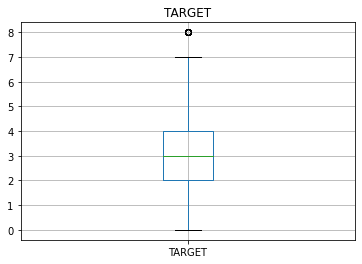

In [12]:
#Show Temperature distribution
import matplotlib.pyplot as plt
import seaborn as sns

df3.boxplot(column=['TARGET'], return_type='axes');
plt.title("TARGET")



Text(0.5, 1.0, 'TARGET')

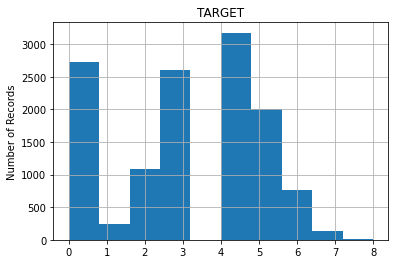

In [13]:
#Show Target distribution
df3.hist(column=['TARGET']);
plt.ylabel("Number of Records")
plt.title("TARGET")

Text(0.5, 1.0, 'FixedAcidity')

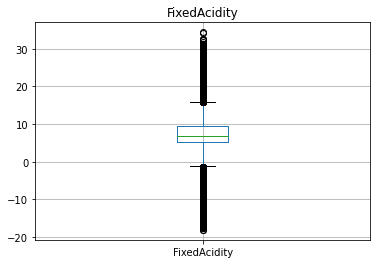

In [14]:
#Show FixedAcidity distribution
df3.boxplot(column=['FixedAcidity'], return_type='axes');
plt.title("FixedAcidity")



Text(0.5, 1.0, 'FixedAcidity')

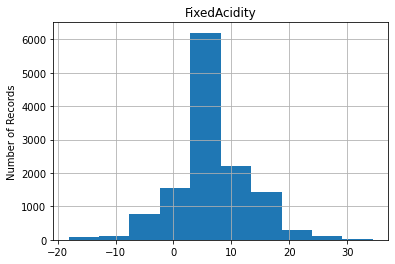

In [15]:
#Show FixedAcidity distribution
df3.hist(column=['FixedAcidity']);
plt.ylabel("Number of Records")
plt.title("FixedAcidity")

Text(0.5, 1.0, 'VolatileAcidity')

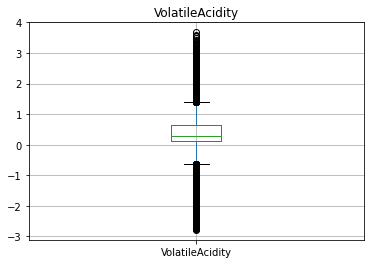

In [16]:
#Show VolatileAcidity distribution
df3.boxplot(column=['VolatileAcidity'], return_type='axes');
plt.title("VolatileAcidity")



Text(0.5, 1.0, 'VolatileAcidity')

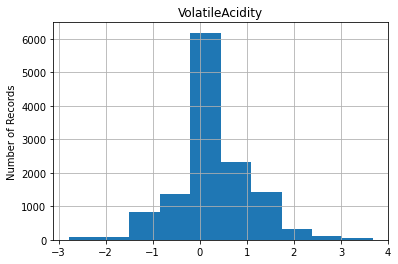

In [17]:
#Show VolatileAcidity distribution
df3.hist(column=['VolatileAcidity']);
plt.ylabel("Number of Records")
plt.title("VolatileAcidity")

Text(0.5, 1.0, 'CitricAcid')

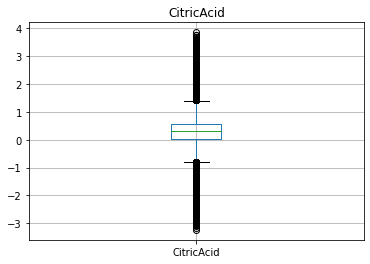

In [18]:
#Show CitricAcid distribution
df3.boxplot(column=['CitricAcid'], return_type='axes');
plt.title("CitricAcid")



Text(0.5, 1.0, 'CitricAcid')

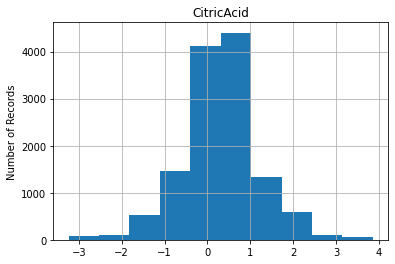

In [19]:
#Show CitricAcid distribution
df3.hist(column=['CitricAcid']);
plt.ylabel("Number of Records")
plt.title("CitricAcid")

Text(0.5, 1.0, 'ResidualSugar')

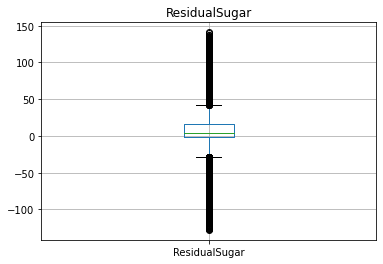

In [20]:
#Show ResidualSugar distribution
df3.boxplot(column=['ResidualSugar'], return_type='axes');
plt.title("ResidualSugar")



Text(0.5, 1.0, 'ResidualSugar')

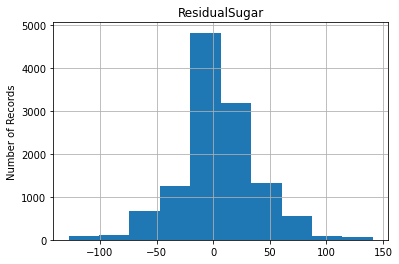

In [21]:
#Show ResidualSugar distribution
df3.hist(column=['ResidualSugar']);
plt.ylabel("Number of Records")
plt.title("ResidualSugar")

Text(0.5, 1.0, 'Chlorides')

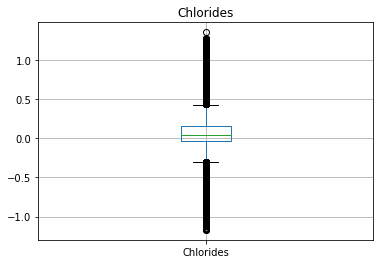

In [22]:
#Show Chlorides distribution
df3.boxplot(column=['Chlorides'], return_type='axes');
plt.title("Chlorides")



Text(0.5, 1.0, 'Chlorides')

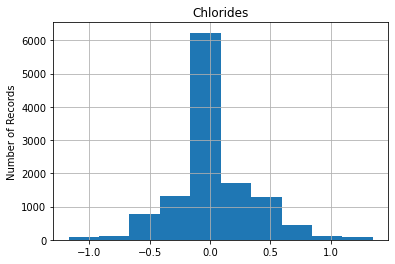

In [23]:
#Show Chlorides distribution
df3.hist(column=['Chlorides']);
plt.ylabel("Number of Records")
plt.title("Chlorides")

Text(0.5, 1.0, 'FreeSulfurDioxide')

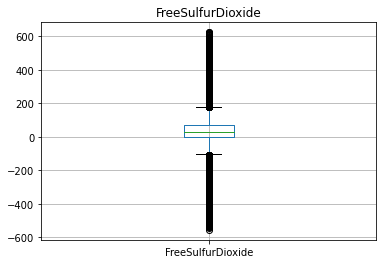

In [24]:
#Show FreeSulfurDioxide distribution
df3.boxplot(column=['FreeSulfurDioxide'], return_type='axes');
plt.title("FreeSulfurDioxide")



Text(0.5, 1.0, 'FreeSulfurDioxide')

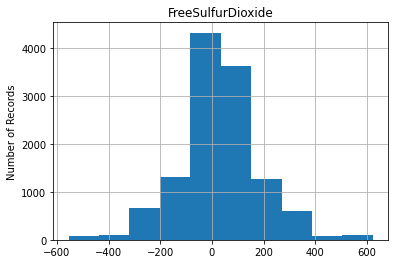

In [25]:
#Show FreeSulfurDioxide distribution
df3.hist(column=['FreeSulfurDioxide']);
plt.ylabel("Number of Records")
plt.title("FreeSulfurDioxide")

Text(0.5, 1.0, 'TotalSulfurDioxide')

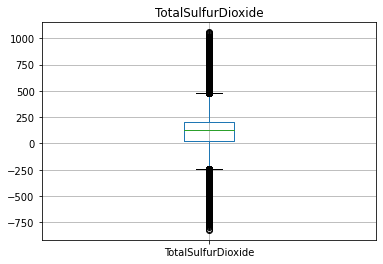

In [26]:
#Show TotalSulfurDioxide distribution
df3.boxplot(column=['TotalSulfurDioxide'], return_type='axes');
plt.title("TotalSulfurDioxide")



Text(0.5, 1.0, 'TotalSulfurDioxide')

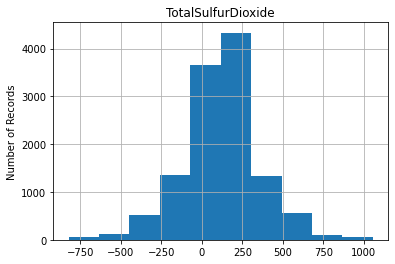

In [27]:
#Show TotalSulfurDioxide distribution
df3.hist(column=['TotalSulfurDioxide']);
plt.ylabel("Number of Records")
plt.title("TotalSulfurDioxide")

Text(0.5, 1.0, 'Density')

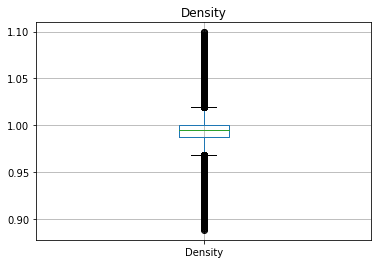

In [28]:
#Show Density distribution
df3.boxplot(column=['Density'], return_type='axes');
plt.title("Density")



Text(0.5, 1.0, 'Density')

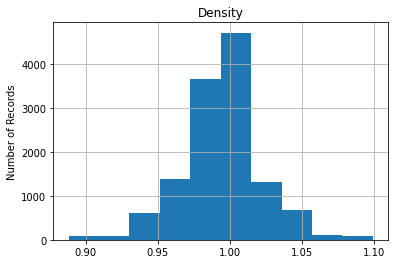

In [29]:
#Show Density distribution
df3.hist(column=['Density']);
plt.ylabel("Number of Records")
plt.title("Density")

Text(0.5, 1.0, 'pH')

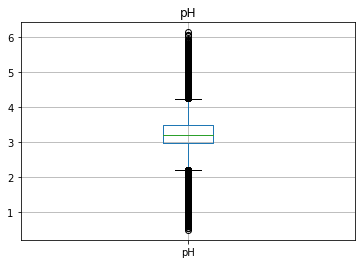

In [30]:
#Show PH distribution
df3.boxplot(column=['pH'], return_type='axes');
plt.title("pH")



Text(0.5, 1.0, 'pH')

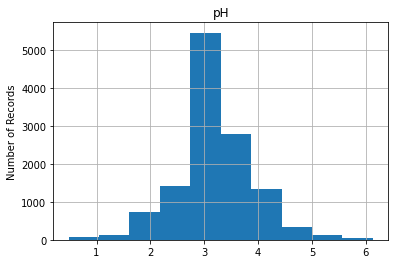

In [31]:
#Show PH distribution
df3.hist(column=['pH']);
plt.ylabel("Number of Records")
plt.title("pH")

Text(0.5, 1.0, 'Sulphates')

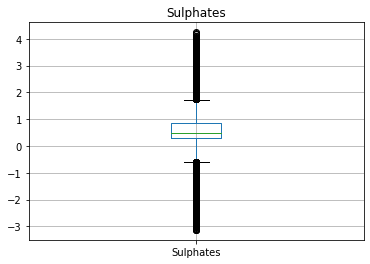

In [32]:
#Show Sulphates distribution
df3.boxplot(column=['Sulphates'], return_type='axes');
plt.title("Sulphates")



Text(0.5, 1.0, 'Sulphates')

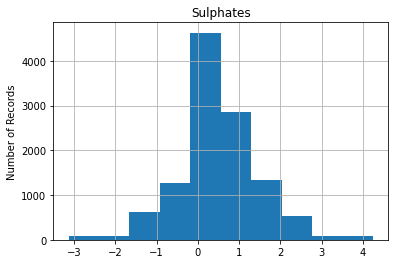

In [33]:
#Show Sulphates distribution
df3.hist(column=['Sulphates']);
plt.ylabel("Number of Records")
plt.title("Sulphates")

Text(0.5, 1.0, 'Alcohol')

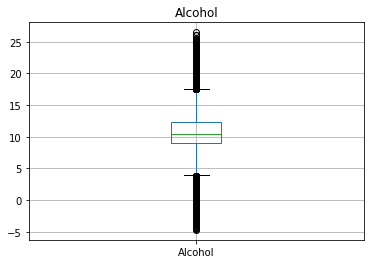

In [34]:
#Show Alcohol distribution
df3.boxplot(column=['Alcohol'], return_type='axes');
plt.title("Alcohol")



Text(0.5, 1.0, 'Alcohol')

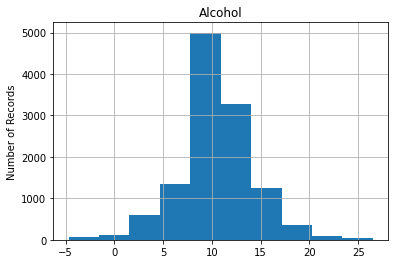

In [35]:
#Show Alcohol distribution
df3.hist(column=['Alcohol']);
plt.ylabel("Number of Records")
plt.title("Alcohol")

Text(0.5, 1.0, 'LabelAppeal')

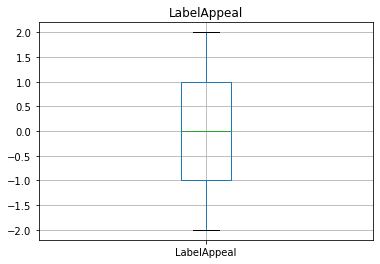

In [36]:
#Show LabelAppeal distribution
df3.boxplot(column=['LabelAppeal'], return_type='axes');
plt.title("LabelAppeal")



Text(0.5, 1.0, 'LabelAppeal')

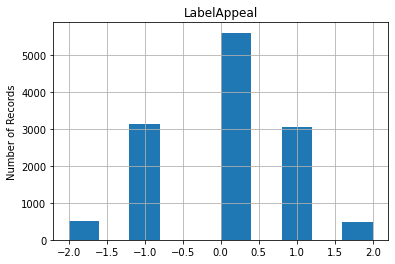

In [37]:
#Show LabelAppeal distribution
df3.hist(column=['LabelAppeal']);
plt.ylabel("Number of Records")
plt.title("LabelAppeal")

Text(0.5, 1.0, 'AcidIndex')

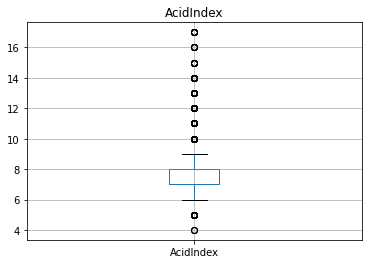

In [38]:
#Show AcidIndex distribution
df3.boxplot(column=['AcidIndex'], return_type='axes');
plt.title("AcidIndex")



Text(0.5, 1.0, 'AcidIndex')

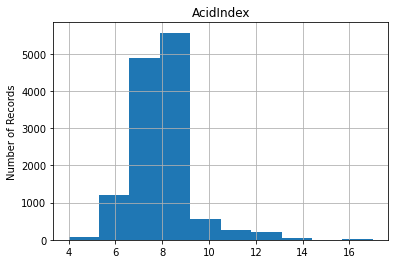

In [39]:
#Show AcidIndex distribution
df3.hist(column=['AcidIndex']);
plt.ylabel("Number of Records")
plt.title("AcidIndex")

Text(0.5, 1.0, 'STARS')

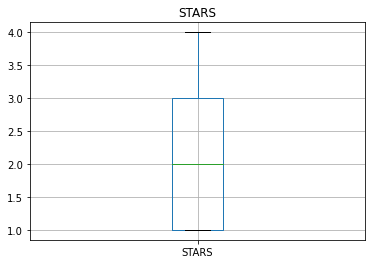

In [40]:
#Show STARS distribution
df3.boxplot(column=['STARS'], return_type='axes');
plt.title("STARS")



Text(0.5, 1.0, 'STARS')

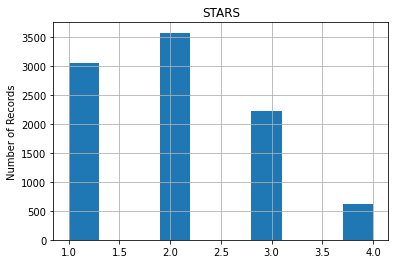

In [41]:
#Show STARS distribution
df3.hist(column=['STARS']);
plt.ylabel("Number of Records")
plt.title("STARS")

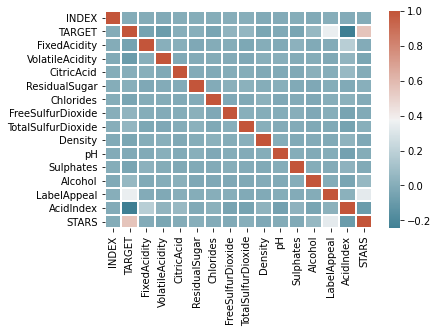

In [42]:
from matplotlib import rcParams

# plot the heatmap
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))
rcParams["figure.figsize"] =10, 10

## **Data Preperation**

For the Data Preparation, we have performed the following operations to resolve the issues previously discovered in the exploratory data analysis.

- We filled in all missing values using np.random.randn() to fill in each missing value with a random value from that column's range. This resolved all issues except for the missing STARS column. which needed to have all now incorrect floating-point values rounded to the nearest whole number.

-Next, we corrected all the data with incorrect negative values by using .abs() to substitute them for positive values.


In [43]:
import numpy as np

In [44]:
df3["ResidualSugar"].fillna(value=np.random.randn(), inplace=True)
df3["Chlorides"].fillna(value=np.random.randn(), inplace=True)
df3["FreeSulfurDioxide"].fillna(value=np.random.randn(), inplace=True)
df3["TotalSulfurDioxide"].fillna(value=np.random.randn(), inplace=True)
df3["Density"].fillna(value=np.random.randn(), inplace=True)       
df3["pH"].fillna(value=np.random.randn(), inplace=True)           
df3["Sulphates"].fillna(value=np.random.randn(), inplace=True)      
df3["Alcohol"].fillna(value=np.random.randn(), inplace=True)           
df3["LabelAppeal"].fillna(value=np.random.randn(), inplace=True)            
df3["AcidIndex"].fillna(value=np.random.randn(), inplace=True)
df3["STARS"].fillna(value=np.random.randn(), inplace=True)  

In [45]:
df3['FixedAcidity'] = df3['FixedAcidity'].abs()
df3['VolatileAcidity'] = df3['VolatileAcidity'].abs()
df3["CitricAcid"] = df3["CitricAcid"].abs()
df3["ResidualSugar"] = df3["ResidualSugar"].abs()
df3["Chlorides"] = df3["Chlorides"].abs()
df3['FreeSulfurDioxide'] = df3['FreeSulfurDioxide'].abs()
df3['TotalSulfurDioxide'] = df3['TotalSulfurDioxide'].abs()
df3["Sulphates"] = df3["Sulphates"].abs()
df3["Alcohol"] = df3["Alcohol"].abs()

In [46]:
df3["STARS"] = df3["STARS"].round(decimals=0)

## **Prepped Data Review**

For our data review, we gained the following insights.

-Our Target distribution remained largely identical.

-FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates, and Alcohol now no longer have any negative values and have a new distribution as a result.

-We see that aside from the fixed negative numbers the overall distribution of the data remains the same after filling in missing values. This is good as we did not want the distribution of the data to change as a result of our imputation.

In [47]:
#Show The Data
df3

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.200000,0.567000,0.030403,268.000000,0.99280,3.33,0.590000,9.900000,0,8,2.0
1,2,3,4.5,0.160,0.81,26.100000,0.425000,15.000000,327.000000,1.02792,3.38,0.700000,2.555639,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.800000,0.037000,214.000000,142.000000,0.99518,3.12,0.480000,22.000000,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.800000,0.425000,22.000000,115.000000,0.99640,2.24,1.830000,6.200000,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.400000,1.394252,167.000000,108.000000,0.99457,3.12,1.770000,13.700000,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.000000,0.043000,17.000000,101.000000,1.01077,3.39,0.570000,4.900000,1,5,0.0
12791,16123,5,8.9,0.470,0.29,84.900000,0.259000,54.000000,1.187501,0.99518,4.46,1.200000,2.555639,-1,8,2.0
12792,16127,4,6.0,0.170,1.10,37.000000,0.078000,25.000000,108.000000,0.99076,3.25,1.610505,12.300000,0,6,2.0
12793,16128,3,7.7,0.320,0.12,1.240214,0.029000,26.000000,274.000000,0.99060,3.97,0.620000,11.000000,-1,6,2.0


In [48]:
#Show the tail of the data
df3.tail()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12790,16120,0,5.0,0.79,2.01,5.000000,0.043000,17.0,101.000000,1.01077,3.39,0.570000,4.900000,1,5,0.0
12791,16123,5,8.9,0.47,0.29,84.900000,0.259000,54.0,1.187501,0.99518,4.46,1.200000,2.555639,-1,8,2.0
12792,16127,4,6.0,0.17,1.10,37.000000,0.078000,25.0,108.000000,0.99076,3.25,1.610505,12.300000,0,6,2.0
12793,16128,3,7.7,0.32,0.12,1.240214,0.029000,26.0,274.000000,0.99060,3.97,0.620000,11.000000,-1,6,2.0
12794,16129,4,5.2,0.04,0.81,52.700000,1.394252,106.0,242.000000,0.99454,3.94,0.120000,9.900000,0,7,2.0


In [49]:
#Show the description
df3.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.00000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,22.302503,0.280983,101.28618,193.491784,0.994203,3.107903,0.918903,10.117119,-0.009066,7.772724,1.505744
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.794441,0.342346,107.89493,165.139630,0.026538,0.871745,0.662674,3.946354,0.891089,1.323926,1.186538
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.888090,-0.022723,0.000000,0.000000,-2.000000,4.000000,0.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,2.600000,0.046000,25.00000,89.000000,0.987720,2.890000,0.450000,8.700000,-1.000000,7.000000,0.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,11.750000,0.120000,51.00000,147.500000,0.994490,3.190000,0.640000,10.200000,0.000000,8.000000,1.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,37.200000,0.412000,164.00000,251.000000,1.000515,3.450000,1.420000,12.200000,1.000000,8.000000,2.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.394252,623.00000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [50]:
#Show the info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12795 non-null  float64
 6   Chlorides           12795 non-null  float64
 7   FreeSulfurDioxide   12795 non-null  float64
 8   TotalSulfurDioxide  12795 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12795 non-null  float64
 11  Sulphates           12795 non-null  float64
 12  Alcohol             12795 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               12795 non-null  float64
dtypes: f

In [51]:
#Show the shape
df3.shape

(12795, 16)

In [52]:
#Show the columns
df3.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [53]:
#Show the data type
df3.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

Text(0.5, 1.0, 'TARGET')

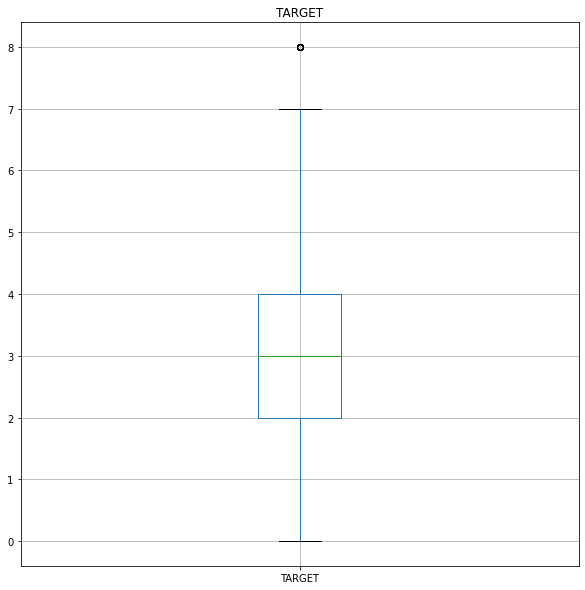

In [54]:
#Show Temperature distribution
import matplotlib.pyplot as plt
import seaborn as sns

df3.boxplot(column=['TARGET'], return_type='axes');
plt.title("TARGET")



Text(0.5, 1.0, 'TARGET')

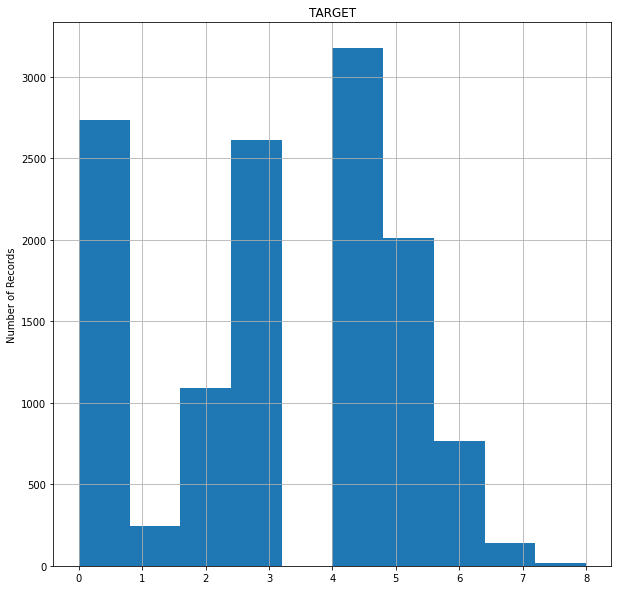

In [55]:
#Show Target distribution
df3.hist(column=['TARGET']);
plt.ylabel("Number of Records")
plt.title("TARGET")

Text(0.5, 1.0, 'FixedAcidity')

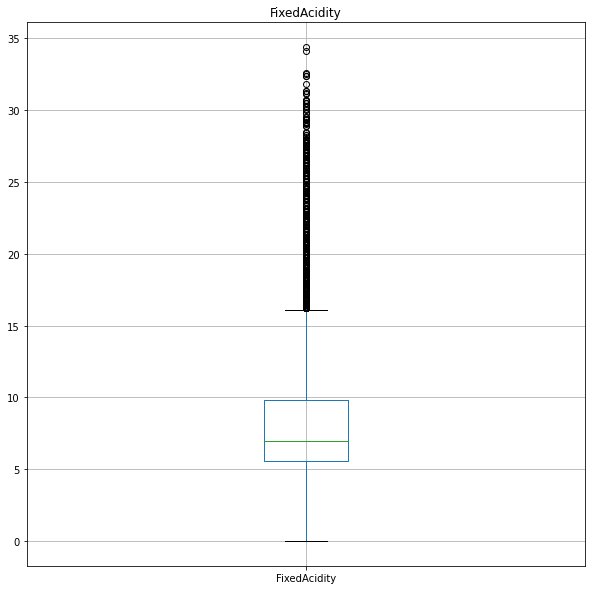

In [56]:
#Show FixedAcidity distribution
df3.boxplot(column=['FixedAcidity'], return_type='axes');
plt.title("FixedAcidity")



Text(0.5, 1.0, 'FixedAcidity')

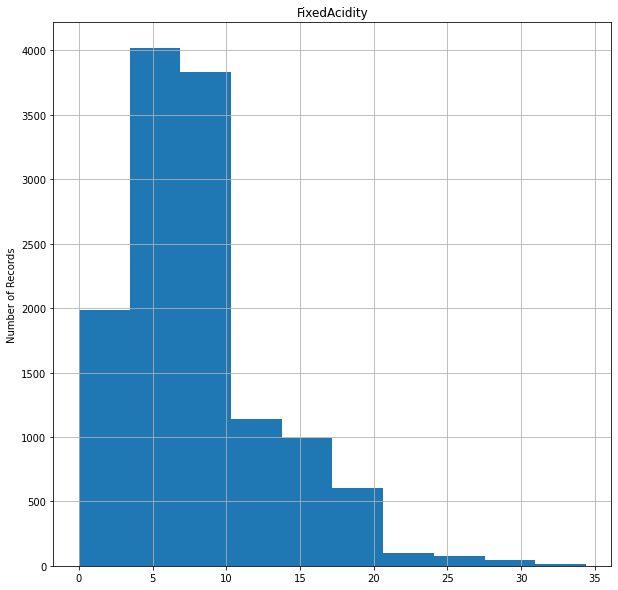

In [57]:
#Show FixedAcidity distribution
df3.hist(column=['FixedAcidity']);
plt.ylabel("Number of Records")
plt.title("FixedAcidity")

Text(0.5, 1.0, 'VolatileAcidity')

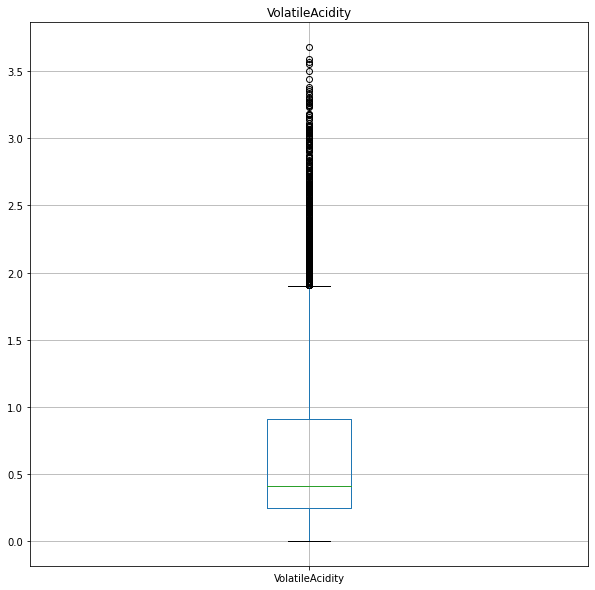

In [58]:
#Show VolatileAcidity distribution
df3.boxplot(column=['VolatileAcidity'], return_type='axes');
plt.title("VolatileAcidity")



Text(0.5, 1.0, 'VolatileAcidity')

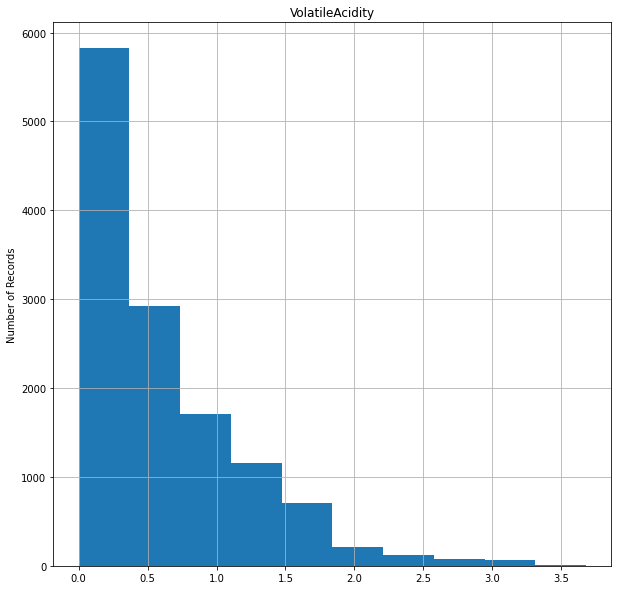

In [59]:
#Show VolatileAcidity distribution
df3.hist(column=['VolatileAcidity']);
plt.ylabel("Number of Records")
plt.title("VolatileAcidity")

Text(0.5, 1.0, 'CitricAcid')

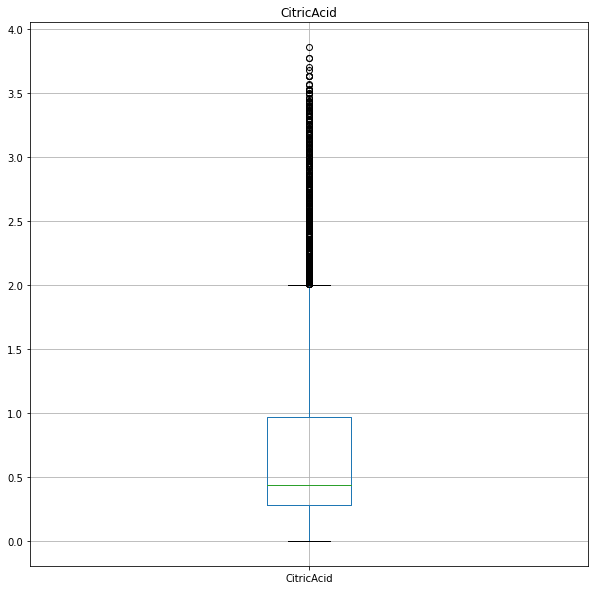

In [60]:
#Show CitricAcid distribution
df3.boxplot(column=['CitricAcid'], return_type='axes');
plt.title("CitricAcid")



Text(0.5, 1.0, 'CitricAcid')

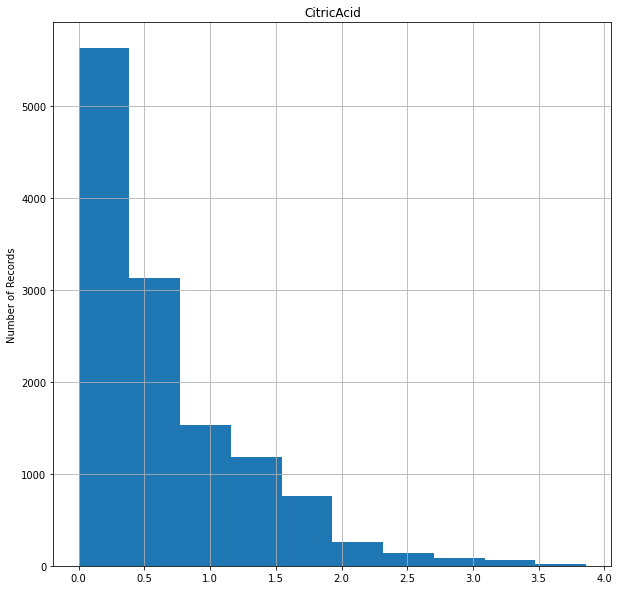

In [61]:
#Show CitricAcid distribution
df3.hist(column=['CitricAcid']);
plt.ylabel("Number of Records")
plt.title("CitricAcid")

Text(0.5, 1.0, 'ResidualSugar')

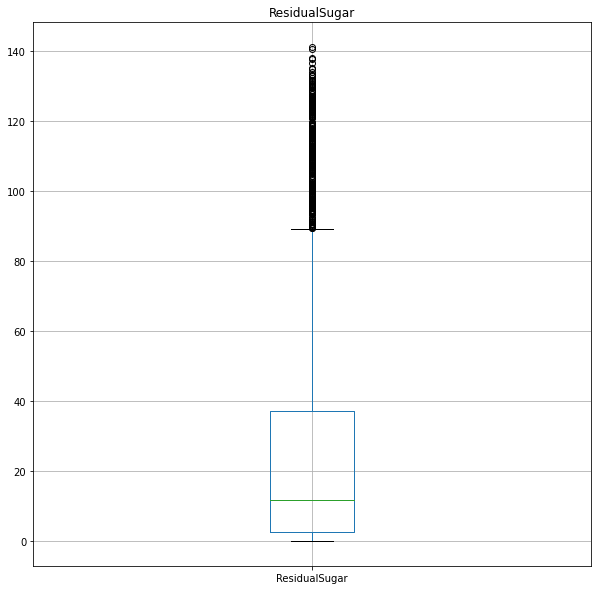

In [62]:
#Show ResidualSugar distribution
df3.boxplot(column=['ResidualSugar'], return_type='axes');
plt.title("ResidualSugar")



Text(0.5, 1.0, 'ResidualSugar')

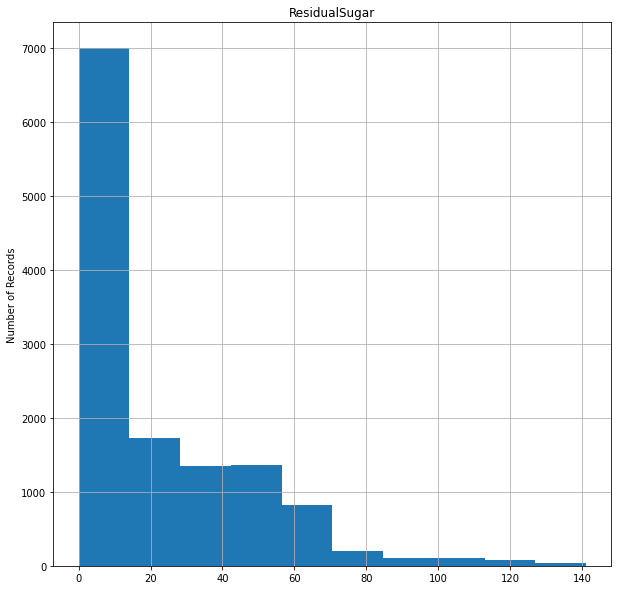

In [63]:
#Show ResidualSugar distribution
df3.hist(column=['ResidualSugar']);
plt.ylabel("Number of Records")
plt.title("ResidualSugar")

Text(0.5, 1.0, 'Chlorides')

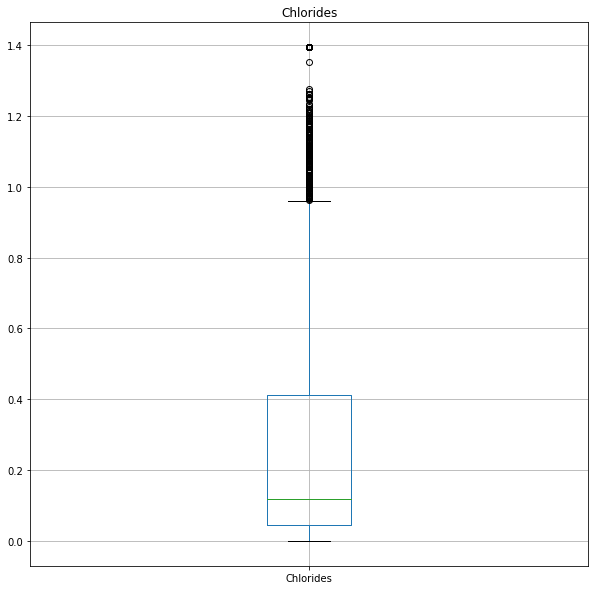

In [64]:
#Show Chlorides distribution
df3.boxplot(column=['Chlorides'], return_type='axes');
plt.title("Chlorides")



Text(0.5, 1.0, 'Chlorides')

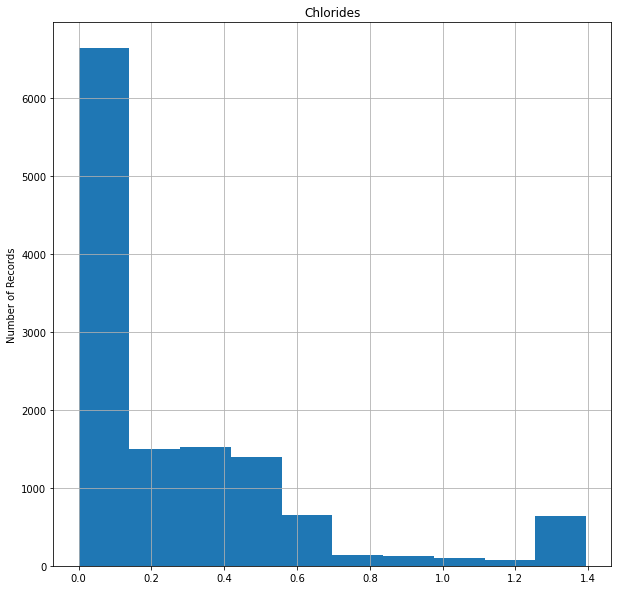

In [65]:
#Show Chlorides distribution
df3.hist(column=['Chlorides']);
plt.ylabel("Number of Records")
plt.title("Chlorides")

Text(0.5, 1.0, 'FreeSulfurDioxide')

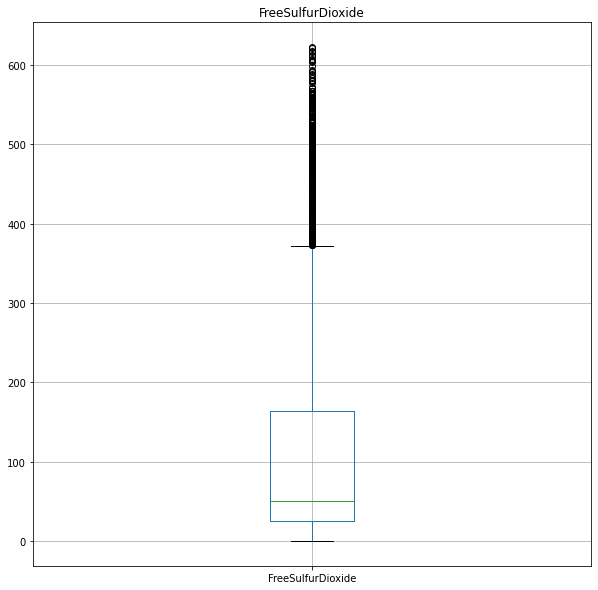

In [66]:
#Show FreeSulfurDioxide distribution
df3.boxplot(column=['FreeSulfurDioxide'], return_type='axes');
plt.title("FreeSulfurDioxide")



Text(0.5, 1.0, 'FreeSulfurDioxide')

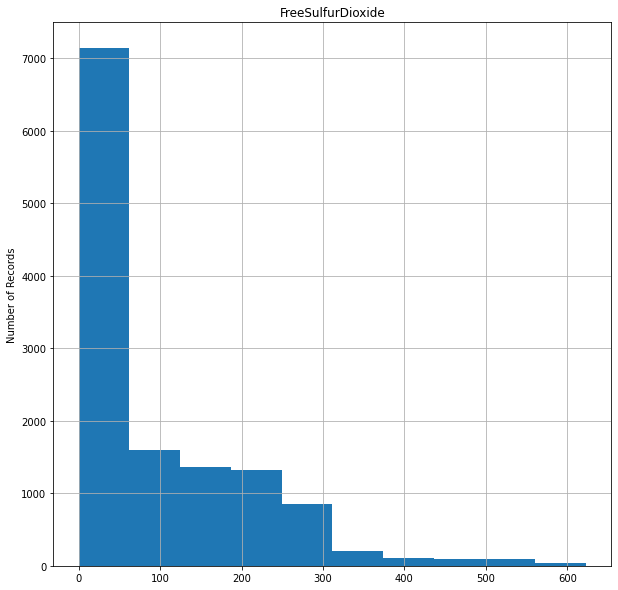

In [67]:
#Show FreeSulfurDioxide distribution
df3.hist(column=['FreeSulfurDioxide']);
plt.ylabel("Number of Records")
plt.title("FreeSulfurDioxide")

Text(0.5, 1.0, 'TotalSulfurDioxide')

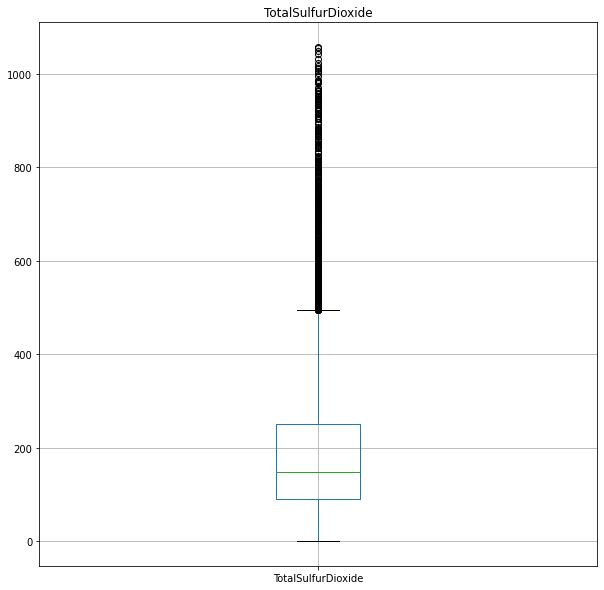

In [68]:
#Show TotalSulfurDioxide distribution
df3.boxplot(column=['TotalSulfurDioxide'], return_type='axes');
plt.title("TotalSulfurDioxide")



Text(0.5, 1.0, 'TotalSulfurDioxide')

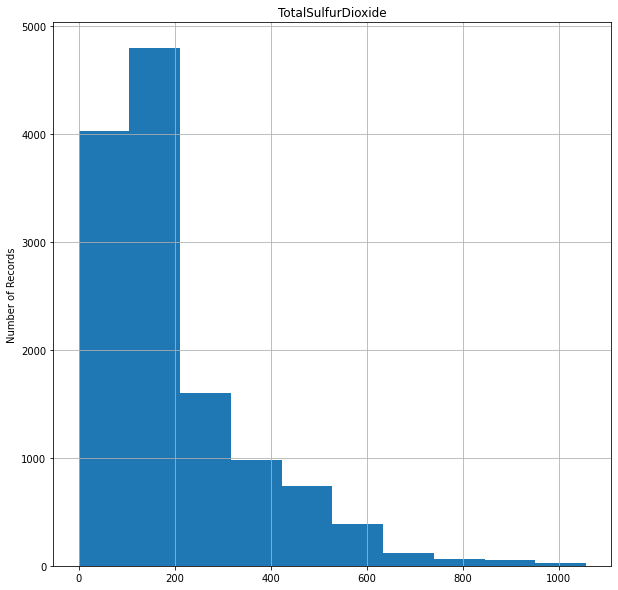

In [69]:
#Show TotalSulfurDioxide distribution
df3.hist(column=['TotalSulfurDioxide']);
plt.ylabel("Number of Records")
plt.title("TotalSulfurDioxide")

Text(0.5, 1.0, 'Density')

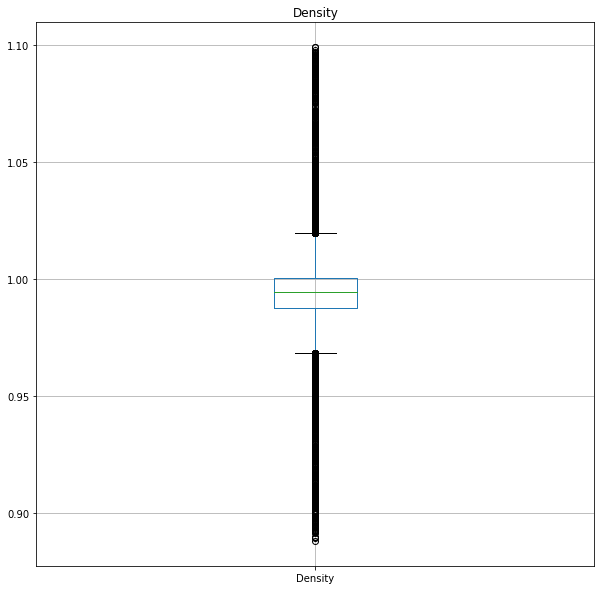

In [70]:
#Show Density distribution
df3.boxplot(column=['Density'], return_type='axes');
plt.title("Density")



Text(0.5, 1.0, 'Density')

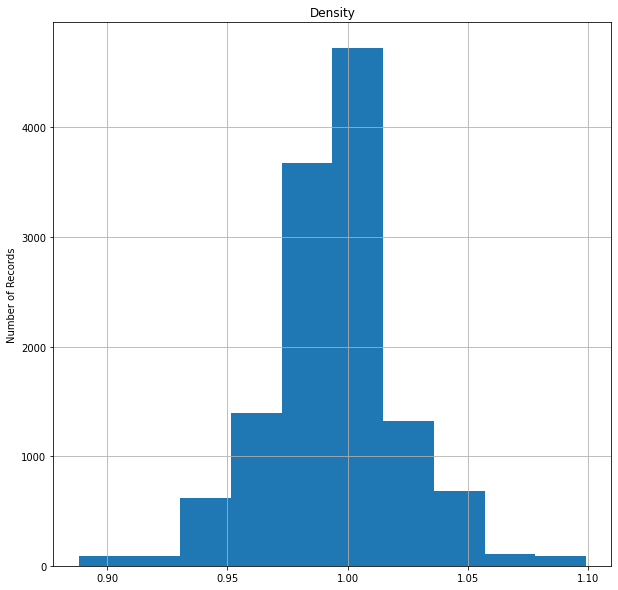

In [71]:
#Show Density distribution
df3.hist(column=['Density']);
plt.ylabel("Number of Records")
plt.title("Density")

Text(0.5, 1.0, 'pH')

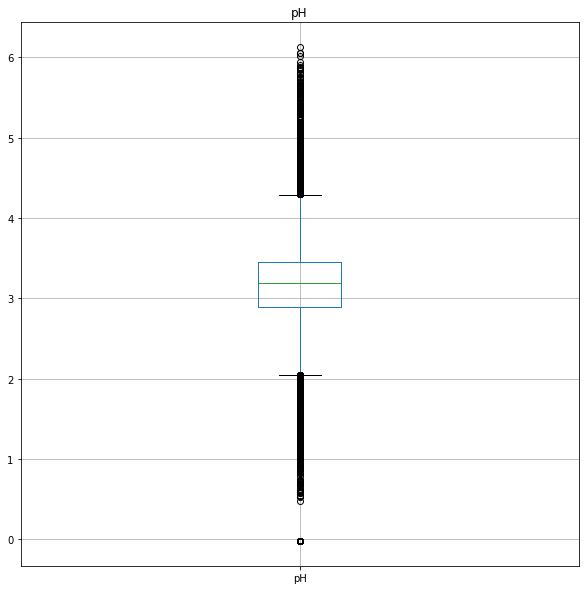

In [72]:
#Show PH distribution
df3.boxplot(column=['pH'], return_type='axes');
plt.title("pH")



Text(0.5, 1.0, 'pH')

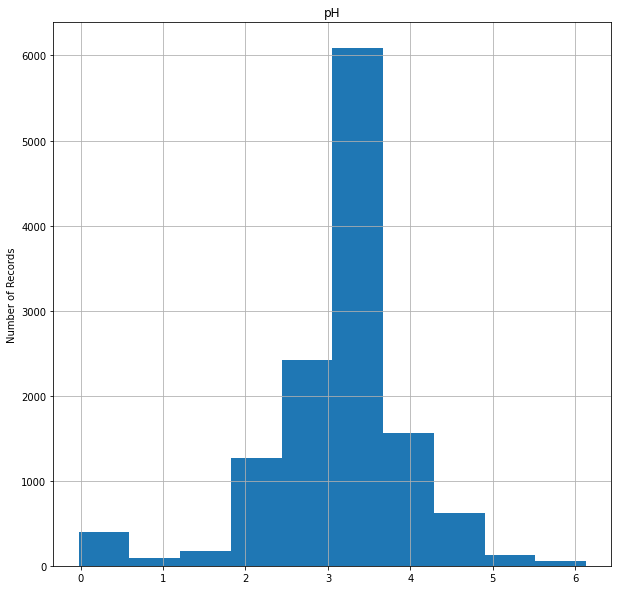

In [73]:
#Show PH distribution
df3.hist(column=['pH']);
plt.ylabel("Number of Records")
plt.title("pH")

Text(0.5, 1.0, 'Sulphates')

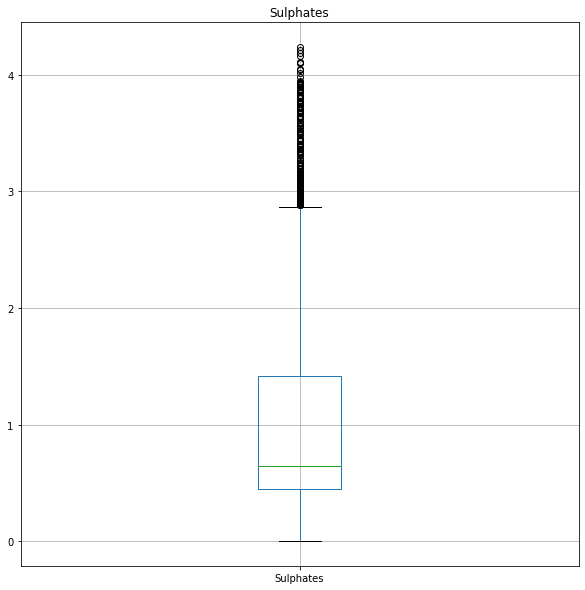

In [74]:
#Show Sulphates distribution
df3.boxplot(column=['Sulphates'], return_type='axes');
plt.title("Sulphates")



Text(0.5, 1.0, 'Sulphates')

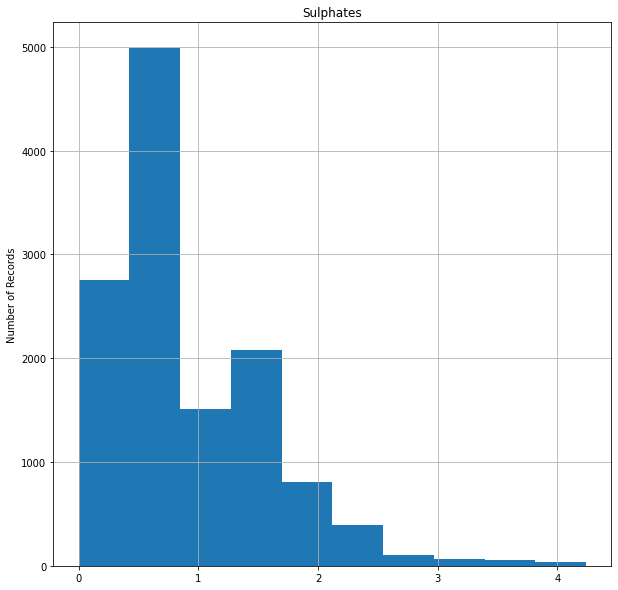

In [75]:
#Show Sulphates distribution
df3.hist(column=['Sulphates']);
plt.ylabel("Number of Records")
plt.title("Sulphates")

Text(0.5, 1.0, 'Alcohol')

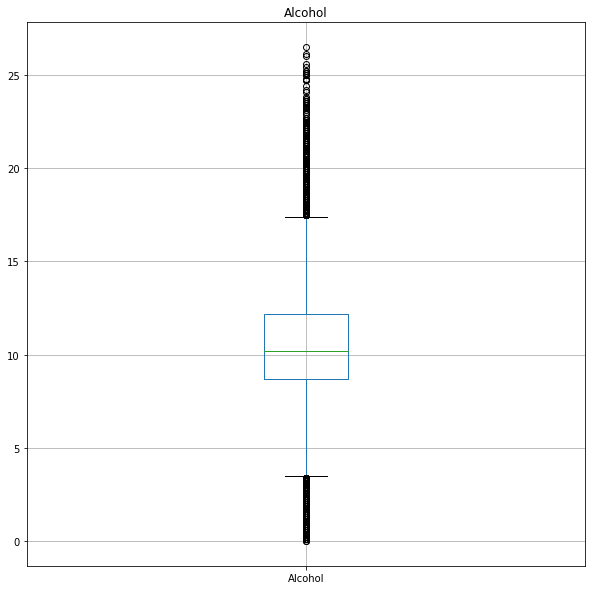

In [76]:
#Show Alcohol distribution
df3.boxplot(column=['Alcohol'], return_type='axes');
plt.title("Alcohol")



Text(0.5, 1.0, 'Alcohol')

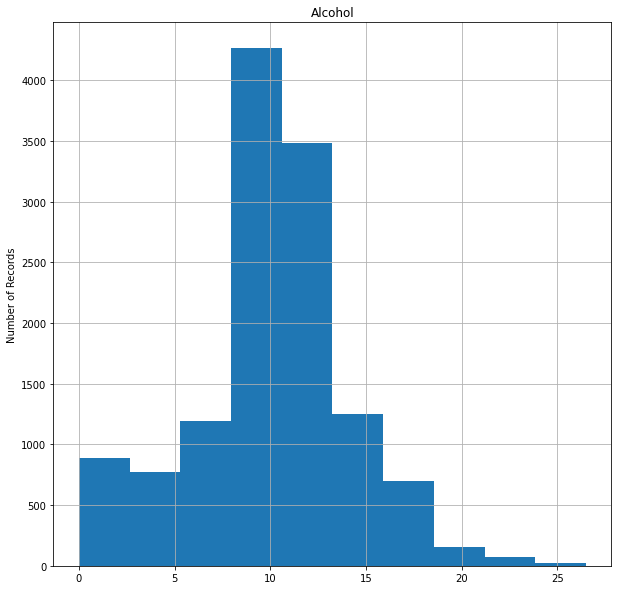

In [77]:
#Show Alcohol distribution
df3.hist(column=['Alcohol']);
plt.ylabel("Number of Records")
plt.title("Alcohol")

Text(0.5, 1.0, 'LabelAppeal')

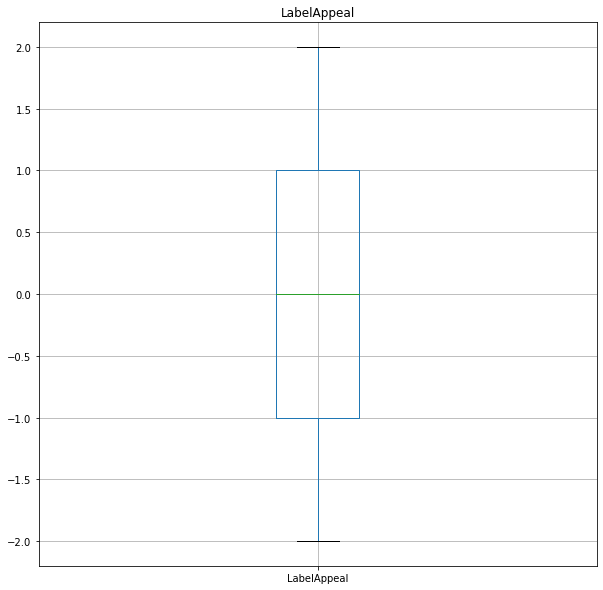

In [78]:
#Show LabelAppeal distribution
df3.boxplot(column=['LabelAppeal'], return_type='axes');
plt.title("LabelAppeal")



Text(0.5, 1.0, 'LabelAppeal')

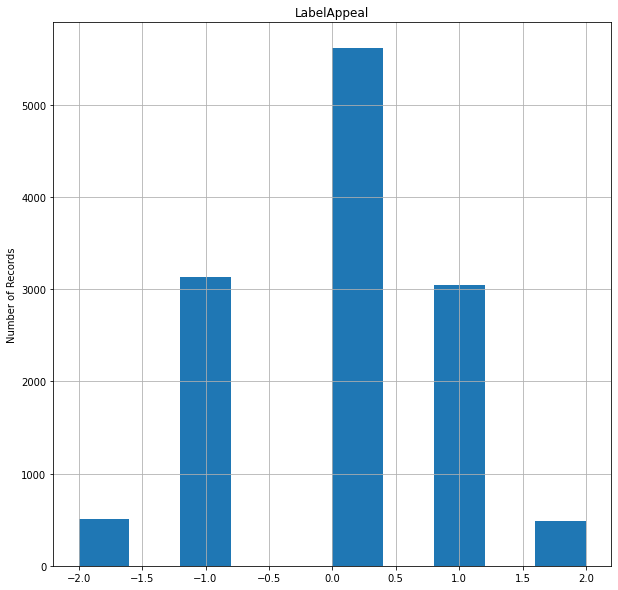

In [79]:
#Show LabelAppeal distribution
df3.hist(column=['LabelAppeal']);
plt.ylabel("Number of Records")
plt.title("LabelAppeal")

Text(0.5, 1.0, 'AcidIndex')

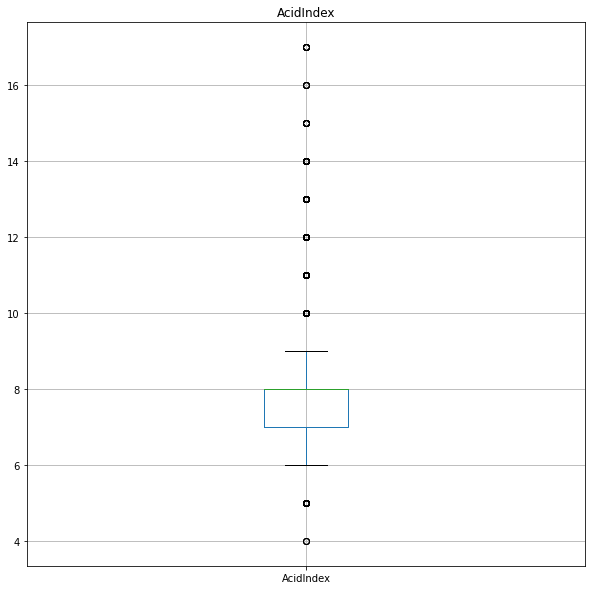

In [80]:
#Show AcidIndex distribution
df3.boxplot(column=['AcidIndex'], return_type='axes');
plt.title("AcidIndex")



Text(0.5, 1.0, 'AcidIndex')

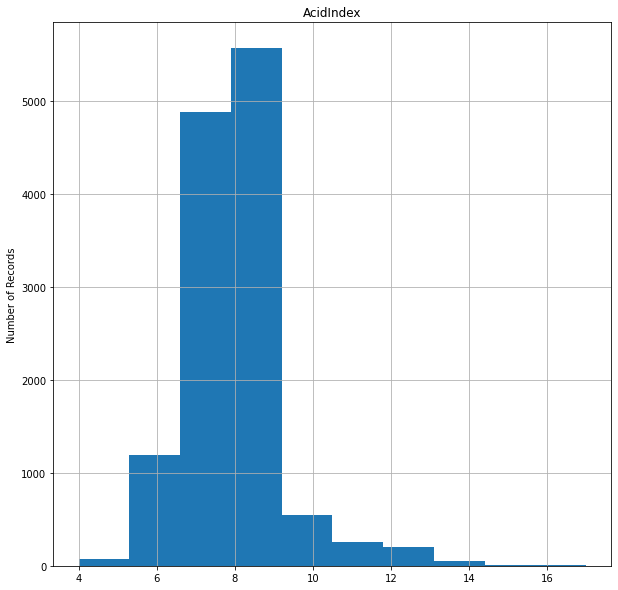

In [81]:
#Show AcidIndex distribution
df3.hist(column=['AcidIndex']);
plt.ylabel("Number of Records")
plt.title("AcidIndex")

Text(0.5, 1.0, 'STARS')

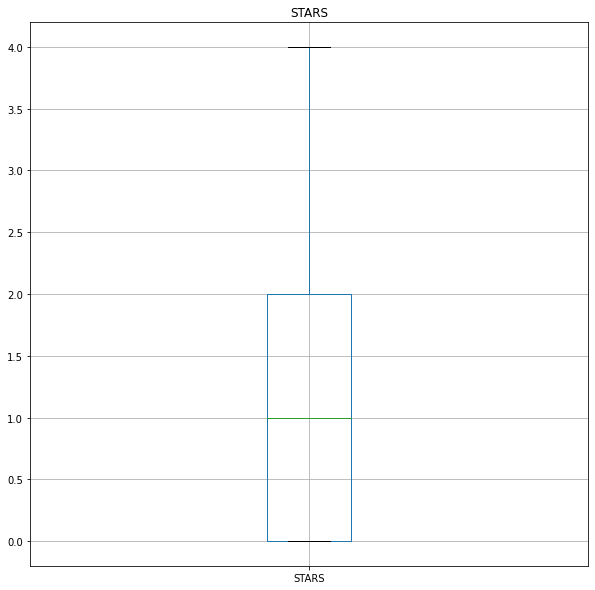

In [82]:
#Show STARS distribution
df3.boxplot(column=['STARS'], return_type='axes');
plt.title("STARS")



Text(0.5, 1.0, 'STARS')

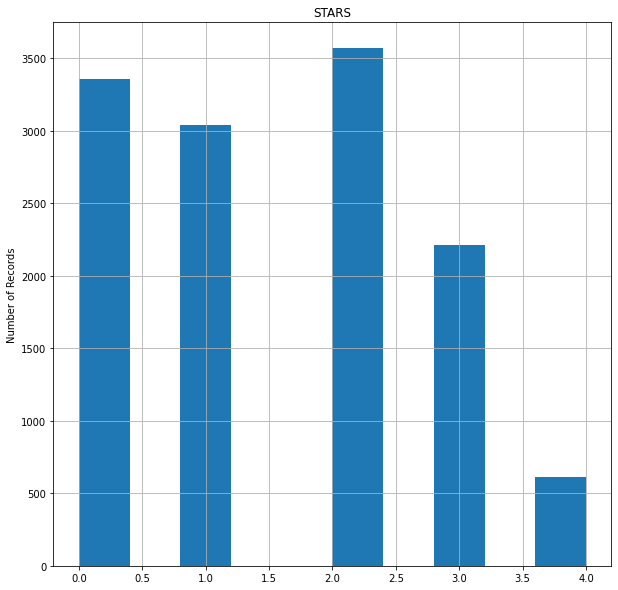

In [83]:
#Show STARS distribution
df3.hist(column=['STARS']);
plt.ylabel("Number of Records")
plt.title("STARS")

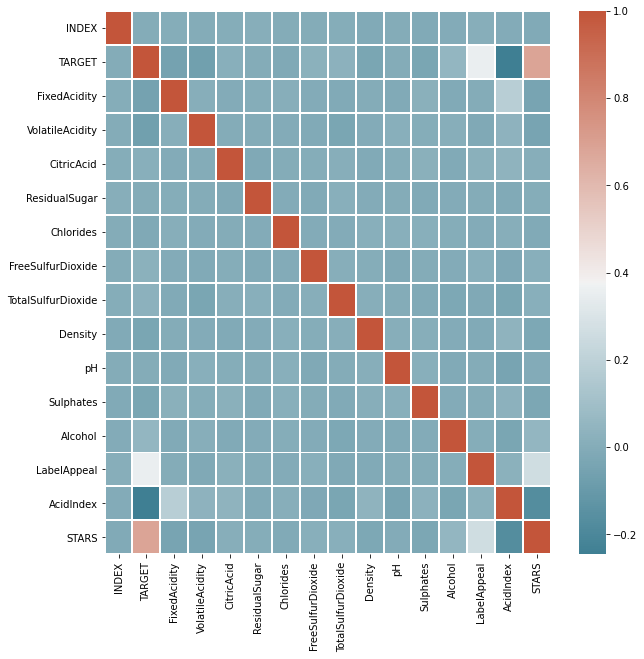

In [84]:
from matplotlib import rcParams

# plot the heatmap
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))
rcParams["figure.figsize"] =10, 10

## **Conclusion**

-We found that doing the necessary domain research is invaluable.  We read several papers from wine authorities around the world, not only did we feel we gained valuable insights that helped us understand each variable with context.

-There were a lot of negative values that needed to be dealt with.  We decided the best practice would be to replace all negative values with their positive versions. For example. no solution including wine can have negative alcohol content. 

-For missing values, we decided the best practice was just to fill in each missing value with a random value from that variable's range. For example, if alcohol content ranged between 3.0-8.0% percent, missing values were filled in with random floating numbers between 3.0-8.0.
This worked for all columns except Stars which while afloat had all zero decimal values. We fixed this by rounding all the columns now incorrect floating-point values to the nearest whole number.

-After re-conducting our EDA, that the data appeared to have stayed relatively the same for columns that did not have negative values. These remain as normal distributions. Columns that had negative values and shouldn't have now appeared as a half-normal distribution.  Correlation diagrams appeared very similar after our alterations.